In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import norm
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
import warnings
from sklearn.model_selection import GridSearchCV

### Loading Saved Variables

In [2]:
common_dir=r"D:\Hemanth Engineering\Assignments\6th Sem\Mini Proj\Final\Average"
X_train_scaled=np.load(fr"{common_dir}\X_train_scaled_avg.npy")
X_test_scaled=np.load(fr"{common_dir}\X_test_scaled_avg.npy")
X_train=np.load(fr"{common_dir}\x_train_avg.npy")
X_test=np.load(fr"{common_dir}\x_test_avg.npy")
y_test=np.load(fr"{common_dir}\y_test_avg.npy")
y_train=np.load(fr"{common_dir}\y_train_avg.npy")
transformed_data_nparray=np.load(fr"{common_dir}\transformed_data_avg.npy")


In [3]:
column_names=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'Benzene', 'Toluene', 'Ozone', 'RH', 'Xylene',  'AT',
       'RF', 'WS', 'WD', 'Temp', 'SR', 'AQI']
transformed_data=pd.DataFrame(transformed_data_nparray,columns=column_names)

In [4]:
X = transformed_data.drop(columns=['AQI'])
y = transformed_data['AQI']
y

0       4.890349
1       4.779124
2       4.804021
3       4.787492
4       4.844187
          ...   
2186    3.828641
2187    4.094345
2188    4.025352
2189    4.204693
2190    4.382027
Name: AQI, Length: 2191, dtype: float64

In [5]:
modelss = {
    "Random_Forest_Regressor": RandomForestRegressor(n_estimators=100, max_depth=15, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42),
    "Bagging_Regressor": BaggingRegressor(n_estimators=300, max_samples=0.9, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, max_depth=7, learning_rate=0.1, num_leaves=61)
}


In [6]:
# Bagging Regressor parameter grid
bagging_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.5, 0.7, 0.9]
}

# LGBM Regressor parameter grid
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'num_leaves': [31, 61, 121]
}

# XGBoost Regressor parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.1, 0.01]
}


In [7]:
# GridSearchCV for Bagging Regressor
bagging_grid_search = GridSearchCV(estimator=modelss["Bagging_Regressor"], param_grid=bagging_param_grid, cv=5, n_jobs=-1)

# GridSearchCV for LGBM Regressor
lgbm_grid_search = GridSearchCV(estimator=modelss["LightGBM"], param_grid=lgbm_param_grid, cv=5, n_jobs=-1)

# GridSearchCV for XGBoost Regressor
xgb_grid_search = GridSearchCV(estimator=modelss["XGBoost"], param_grid=xgb_param_grid, cv=5, n_jobs=-1)


In [8]:
# Fit GridSearchCV for Bagging Regressor
bagging_grid_search.fit(X, y)

# Fit GridSearchCV for LGBM Regressor
lgbm_grid_search.fit(X, y)

# Fit GridSearchCV for XGBoost Regressor
xgb_grid_search.fit(X, y)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4291
[LightGBM] [Info] Number of data points in the train set: 2191, number of used features: 19
[LightGBM] [Info] Start training from score 4.137499
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=10, max_leaves=None,
                                    min_child_weight=None, missing=nan,
    

In [9]:
# Best parameters and best estimator for Bagging Regressor
best_params_bagging = bagging_grid_search.best_params_
best_estimator_bagging = bagging_grid_search.best_estimator_

# Best parameters and best estimator for LGBM Regressor
best_params_lgbm = lgbm_grid_search.best_params_
best_estimator_lgbm = lgbm_grid_search.best_estimator_

# Best parameters and best estimator for XGBoost Regressor
best_params_xgb = xgb_grid_search.best_params_
best_estimator_xgb = xgb_grid_search.best_estimator_


In [10]:
[best_params_bagging,best_params_lgbm,best_params_xgb]

[{'max_samples': 0.9, 'n_estimators': 300},
 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'num_leaves': 31},
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}]

In [11]:
# //Bagging Regressorr:e ’n_estimators’: [100, 200, 300] and ’max_samples’: [0.5, 
# 0.7, 0.9]. 
#
#LGBM n_estimators’: [50, 100, 200], ’max_depth’: [3, 5, 7], ’learning_rate’: [0.01, 0.1, 1], and ’num_leaves’: [31, 61, 121]. 
#XGBoost: ’n_estimators’: [100, 200], ’max_depth’: [5, 10], and ’learning_rate’: [0.1, 0.01].
#

models = {
    "Random_Forest_Regressor": RandomForestRegressor(n_estimators=100, max_depth=15, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=best_params_xgb['n_estimators'], max_depth=best_params_xgb['max_depth'], learning_rate=best_params_xgb['learning_rate'], random_state=42),
    "Bagging_Regressor": BaggingRegressor(n_estimators=best_params_bagging['n_estimators'], max_samples=best_params_bagging['max_samples'], random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=best_params_lgbm['n_estimators'], max_depth=best_params_lgbm['max_depth'], learning_rate=best_params_lgbm['learning_rate'], num_leaves=61)
}


# Random Forest Regressor

In [12]:
#  model: # defined hyperparameters are 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, and 'n_estimators': 100.
randFor = models["Random_Forest_Regressor"]
# Fitting the model
randFor.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, random_state=42)

In [13]:
#score Calculation - R-squared or R2
randFor.score(X_train,y_train) * 100

97.67902461942212

In [14]:
#train
y_pred_train=randFor.predict(X_train)
# Predict on test set
y_pred = randFor.predict(X_test)

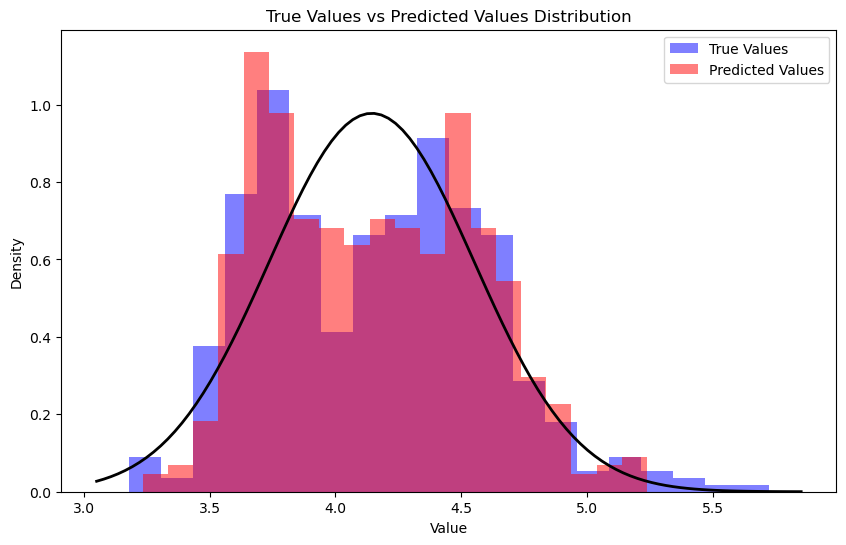

In [15]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred), np.std(y_pred))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution')
plt.legend()
plt.show()

# XGBoost Regressor

In [16]:
xgb_model = models["XGBoost"]
# Fitting the model
xgb_model.fit(X_train, y_train)
#score Calculation - R-squared or R2
xgb_model.score(X_train,y_train) * 100

96.72171965566125

In [17]:
#train
y_pred_train_xgb=xgb_model.predict(X_train)
# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

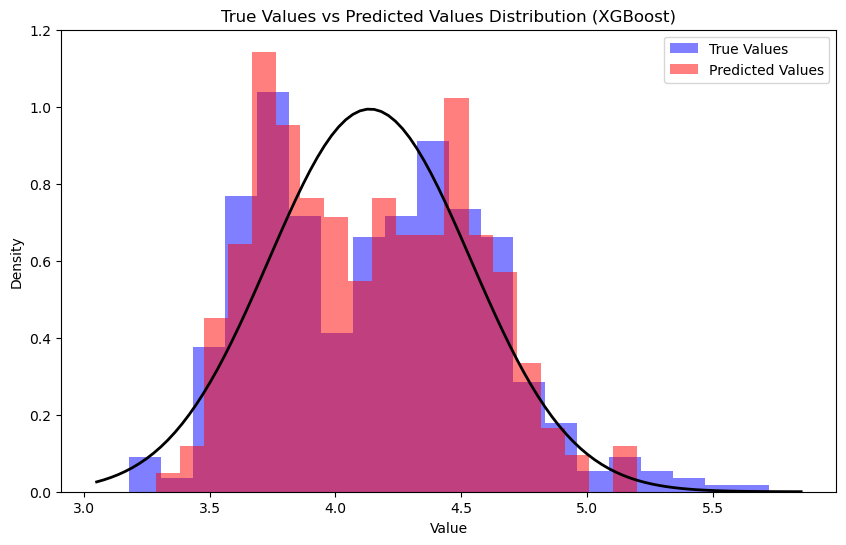

In [18]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_xgb, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred_xgb), np.std(y_pred_xgb))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution (XGBoost)')
plt.legend()
plt.show()

# Bagging Regressor

In [19]:
bagging_model=models["Bagging_Regressor"]
#fitting model
bagging_model.fit(X_train, y_train)
#score Calculation - R-squared or R2
r2_train = bagging_model.score(X_train, y_train) * 100

In [20]:
print(r2_train)

97.55278637035423


In [21]:
#train
y_pred_train_bgr=bagging_model.predict(X_train)
# Predict on test set
y_pred_bgr = bagging_model.predict(X_test)

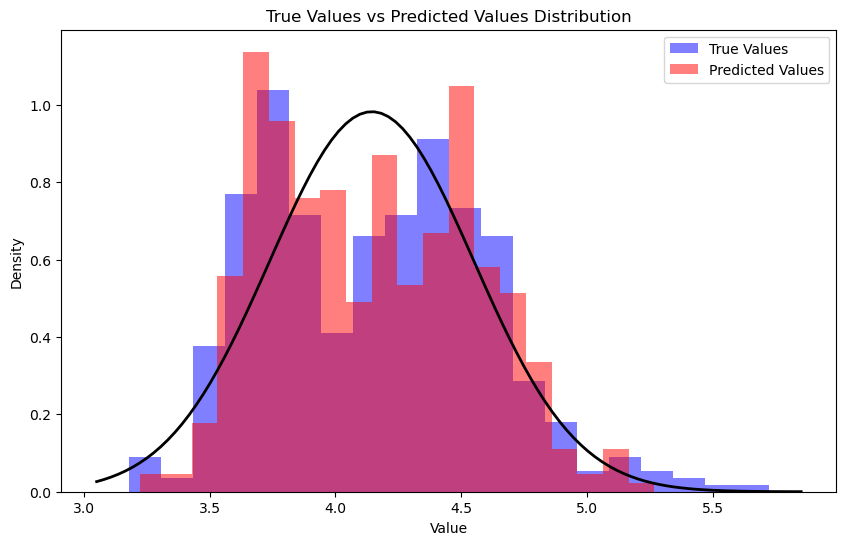

In [22]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_bgr, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred_bgr), np.std(y_pred_bgr))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution')
plt.legend()
plt.show()

# LGBM Regressor

In [23]:
# Ignore LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")

In [24]:
lgbm=models["LightGBM"]
# Fitting the model
lgbm.fit(X_train, y_train)
# Calculating R-squared score
# r2_score = lgbm.score(X_train, y_train) * 100

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4213
[LightGBM] [Info] Number of data points in the train set: 1752, number of used features: 19
[LightGBM] [Info] Start training from score 4.132036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor(max_depth=7, n_estimators=50, num_leaves=61)

In [25]:
#train
y_pred_train_lgbm=lgbm.predict(X_train)
# Predict on test set
y_pred_lgbm = lgbm.predict(X_test)
# Calculate mean squared error
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

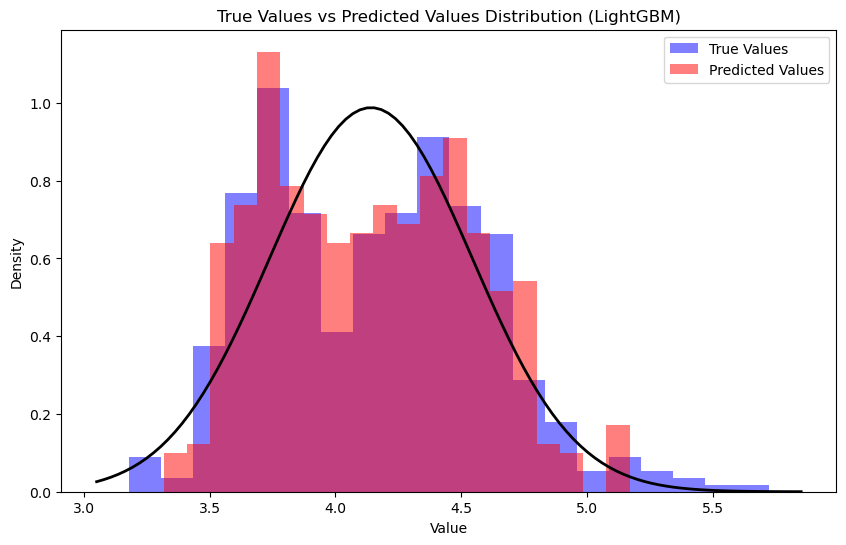

In [26]:
# Plotting the normal distribution of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, density=True, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_lgbm, bins=20, density=True, alpha=0.5, color='red', label='Predicted Values')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(y_pred_lgbm), np.std(y_pred_lgbm))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('True Values vs Predicted Values Distribution (LightGBM)')
plt.legend()
plt.show()


# Comparision of Truevalues vs Predicted Values

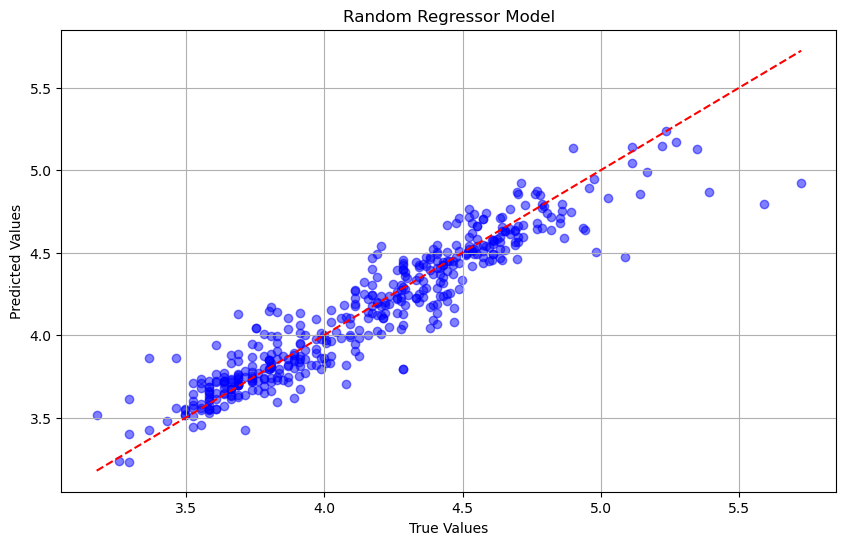

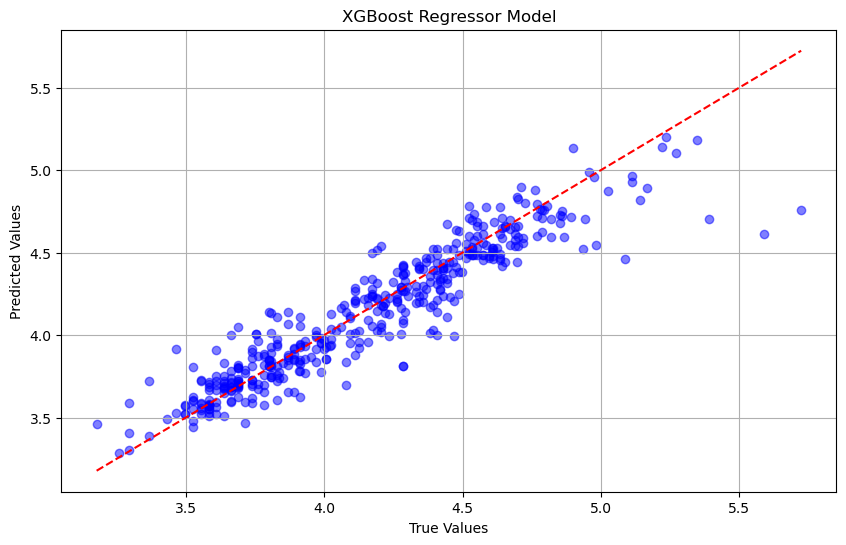

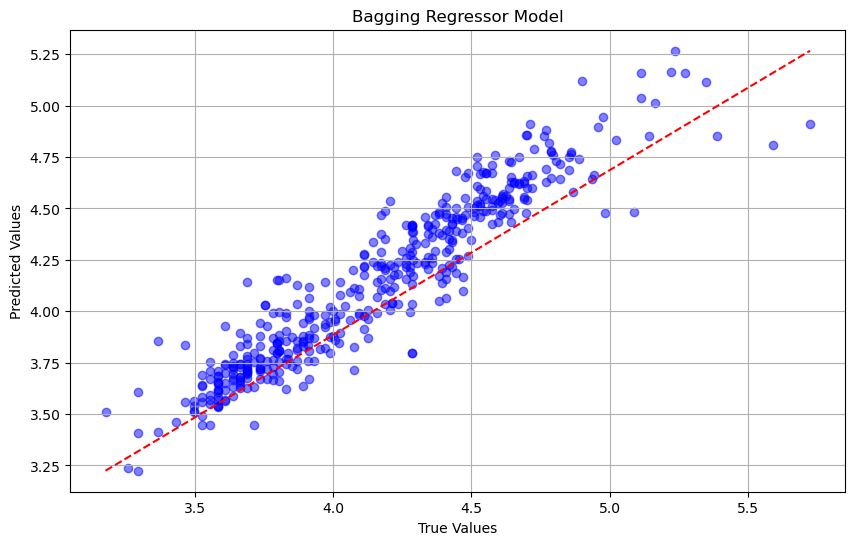

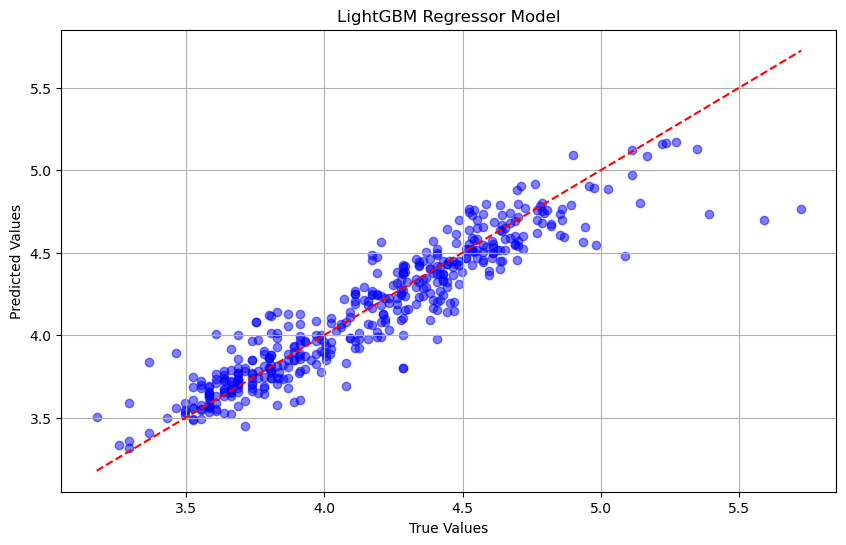

In [27]:
# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Regressor Model')
plt.grid(True)
plt.show()

# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor Model')
plt.grid(True)
plt.show()

# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bgr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred_bgr), max(y_pred_bgr)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Bagging Regressor Model')
plt.grid(True)
plt.show()

# Scatter plot of true values vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgbm, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('LightGBM Regressor Model')
plt.grid(True)
plt.show()

# Comparision of Residuals vs Predicted Values

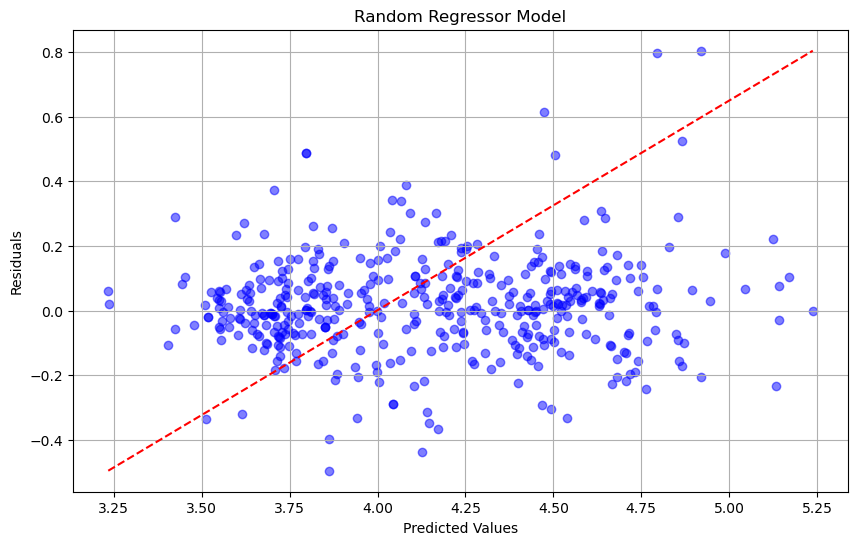

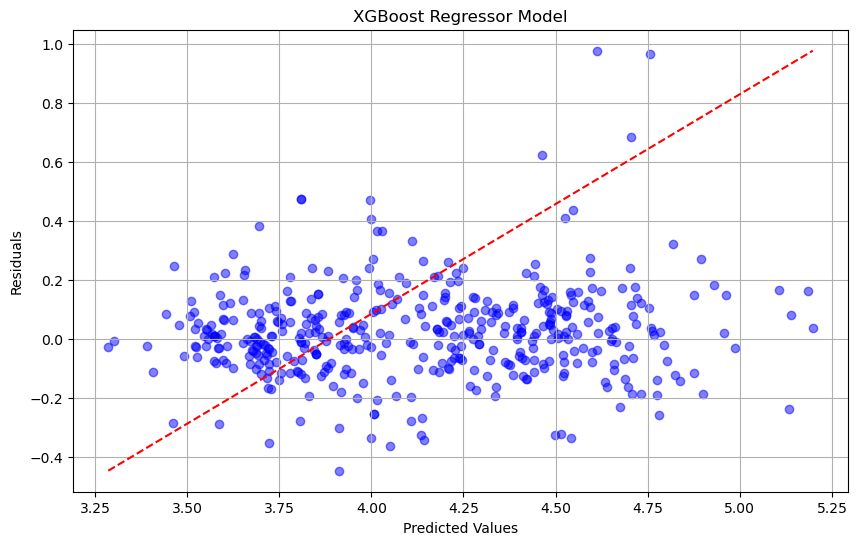

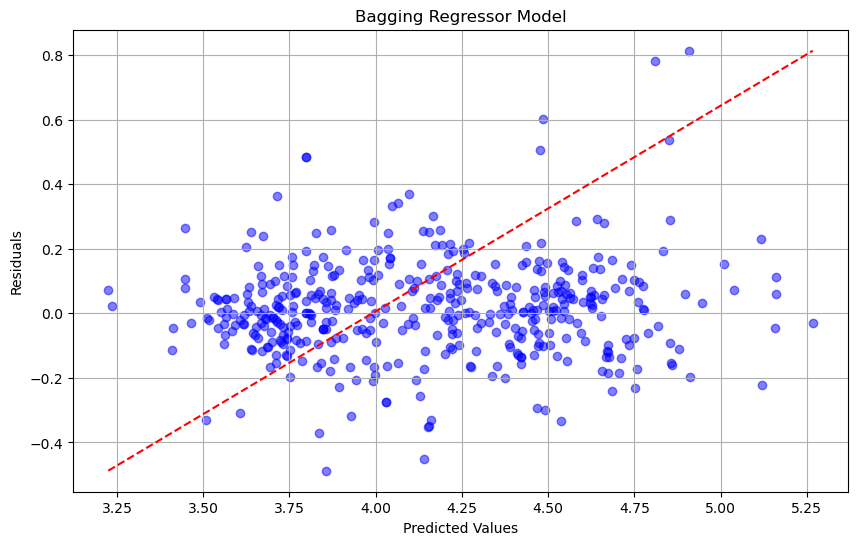

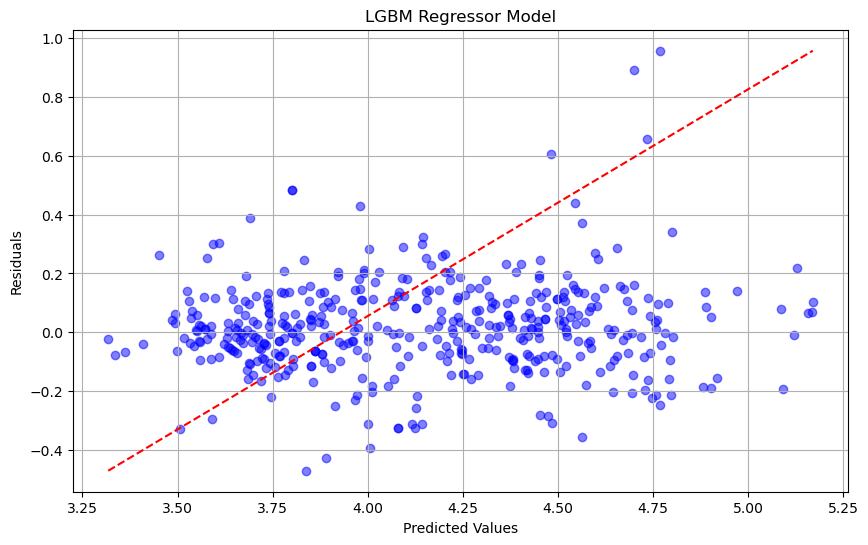

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred,y_test-y_pred , color='blue', alpha=0.5)
plt.plot([min(y_pred), max(y_pred)], [min(y_test-y_pred), max(y_test-y_pred)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Regressor Model')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb,y_test-y_pred_xgb , color='blue', alpha=0.5)
plt.plot([min(y_pred_xgb), max(y_pred_xgb)], [min(y_test-y_pred_xgb), max(y_test-y_pred_xgb)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBoost Regressor Model')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_bgr,y_test-y_pred_bgr , color='blue', alpha=0.5)
plt.plot([min(y_pred_bgr), max(y_pred_bgr)], [min(y_test-y_pred_bgr), max(y_test-y_pred_bgr)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Bagging Regressor Model')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lgbm,y_test-y_pred_lgbm , color='blue', alpha=0.5)
plt.plot([min(y_pred_lgbm), max(y_pred_lgbm)], [min(y_test-y_pred_lgbm), max(y_test-y_pred_lgbm)], color='red', linestyle='--')  # Line indicating perfect prediction
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('LGBM Regressor Model')
plt.grid(True)
plt.show()

# Frequency Of Residuals

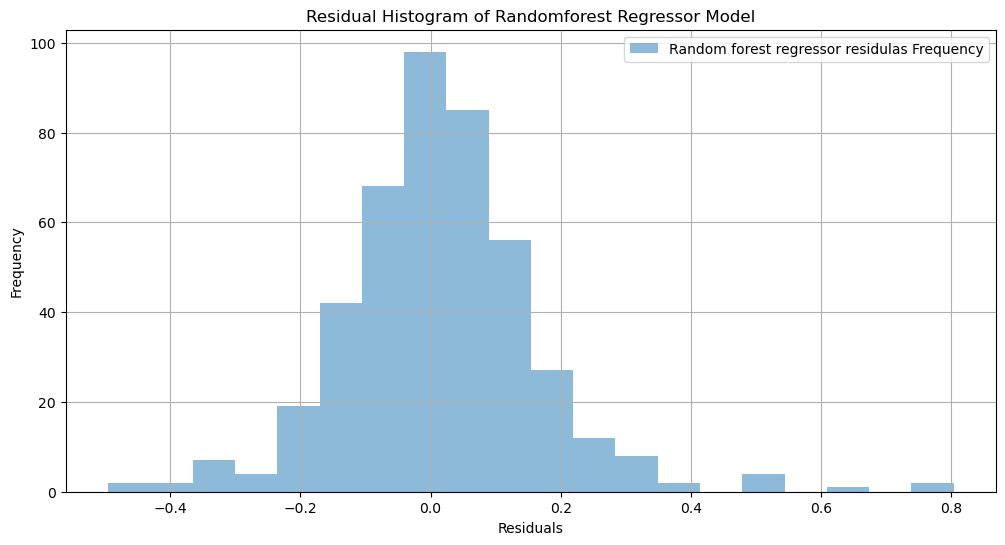

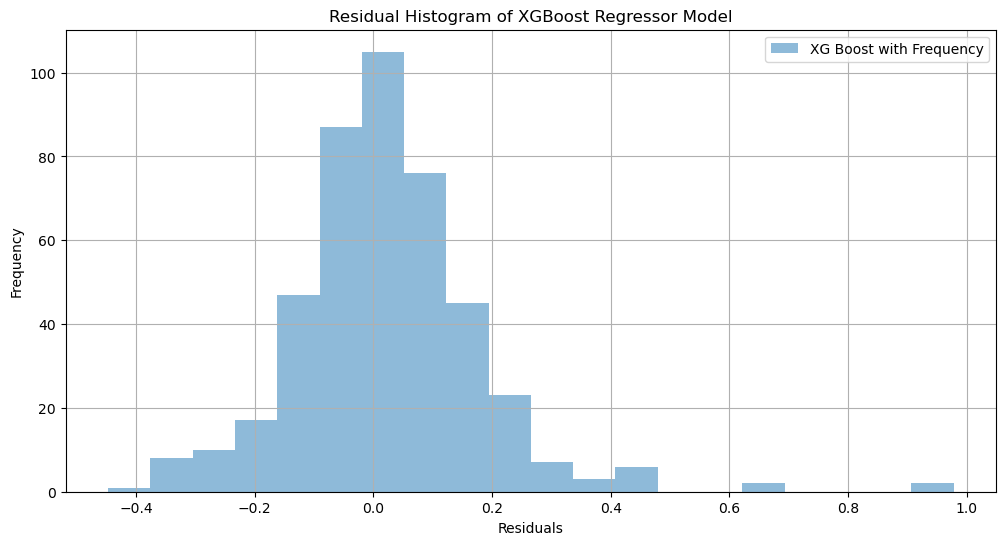

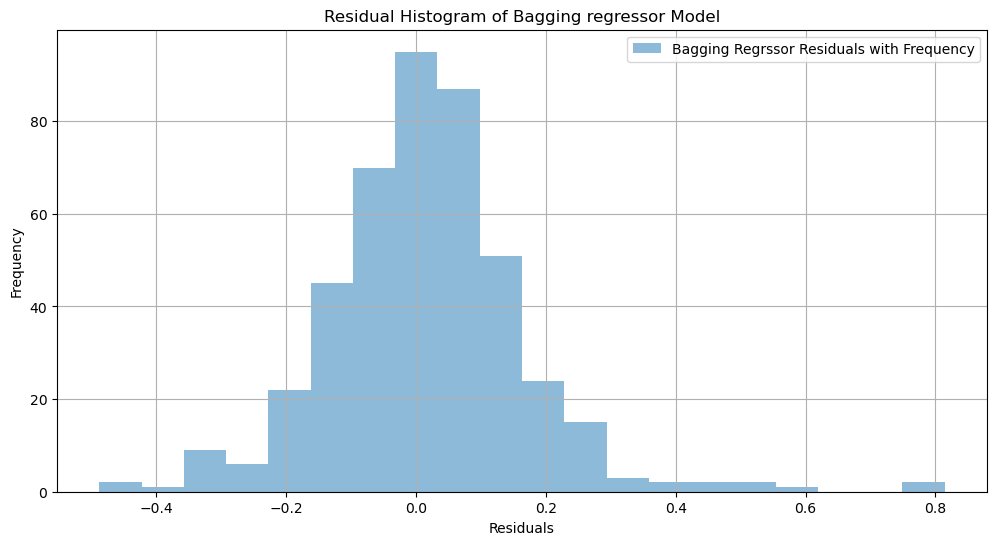

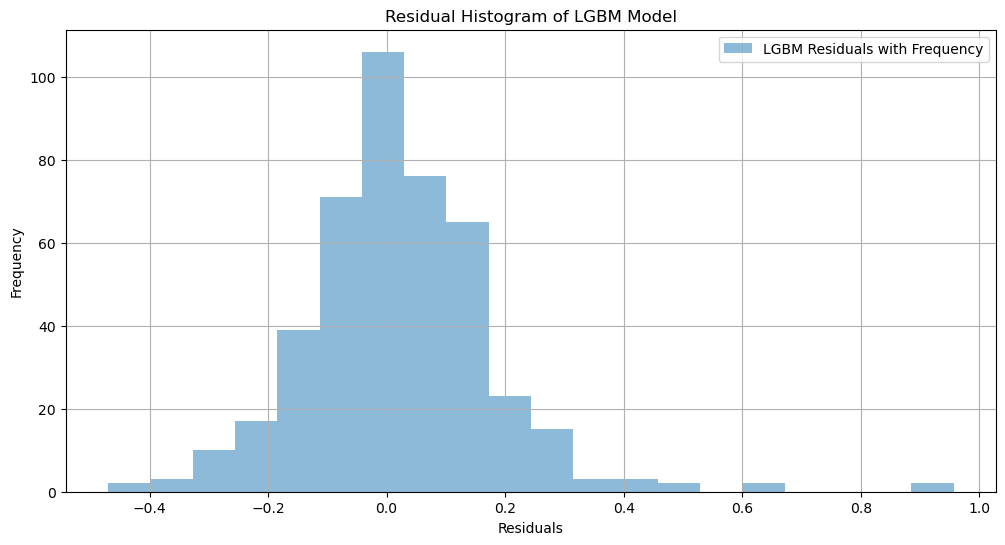

In [29]:

plt.figure(figsize=(12, 6))

plt.hist(y_test-y_pred, bins=20, alpha=0.5, label='Random forest regressor residulas Frequency')

plt.title('Residual Histogram of Randomforest Regressor Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))

plt.hist(y_test-y_pred_xgb, bins=20, alpha=0.5, label='XG Boost with Frequency')

plt.title('Residual Histogram of XGBoost Regressor Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))

plt.hist(y_test-y_pred_bgr, bins=20, alpha=0.5, label='Bagging Regrssor Residuals with Frequency')

plt.title('Residual Histogram of Bagging regressor Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))

plt.hist(y_test-y_pred_lgbm, bins=20, alpha=0.5, label='LGBM Residuals with Frequency')

plt.title('Residual Histogram of LGBM Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Score Calculation for training data

In [30]:
listt=[y_pred_train,y_pred_train_xgb,y_pred_train_bgr,y_pred_train_lgbm]
models_list=['Random Forest','XGBoost','BaggingRegressor','LGBMRegressor']
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Model", "MSE", "RMSE", "R2", "MAE"))
for i in range(len(listt)):
    mse = round(mean_squared_error(y_train, listt[i]),4)
    rmse=round(np.sqrt(mse),4)
    r2=round(r2_score(y_train,listt[i]),4)
    mae=round(mean_absolute_error(y_train,listt[i]),4)
    print("{:<20} {:<10} {:<10} {:<10} {:<10}".format(models_list[i], mse, rmse, r2, mae))

Model                MSE        RMSE       R2         MAE       
Random Forest        0.0046     0.0678     0.9768     0.0444    
XGBoost              0.0064     0.08       0.9672     0.0567    
BaggingRegressor     0.0048     0.0693     0.9755     0.0448    
LGBMRegressor        0.0093     0.0964     0.9525     0.0669    


# Score Calculation for testing data

In [31]:
listt=[y_pred,y_pred_xgb,y_pred_bgr,y_pred_lgbm]
models_list=['Random Forest','XGBoost','BaggingRegressor','LGBMRegressor']
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Model", "MSE", "RMSE", "R2", "MAE"))
for i in range(len(listt)):
    mse = round(mean_squared_error(y_test, listt[i]),4)
    rmse=round(np.sqrt(mse),4)
    r2=round(r2_score(y_test,listt[i]),4)
    mae=round(mean_absolute_error(y_test,listt[i]),4)
    print("{:<20} {:<10} {:<10} {:<10} {:<10}".format(models_list[i], mse, rmse, r2, mae))

Model                MSE        RMSE       R2         MAE       
Random Forest        0.0233     0.1526     0.8822     0.1083    
XGBoost              0.0257     0.1603     0.87       0.1118    
BaggingRegressor     0.023      0.1517     0.8835     0.1083    
LGBMRegressor        0.0253     0.1591     0.8719     0.1127    


# 5 Fold Validation

In [32]:
kf=KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [33]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)


In [34]:
for model_name,model in models.items():
    print(f"Model:{model_name}")
    mse_scores=[]
    R2_scores=[]
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test= X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
        model.fit(X_train,y_train)
        y_pred=randFor.predict(X_test)
        mse=mean_squared_error(y_test,y_pred)
        R2_score=model.score(X_test,y_test)
        mse_scores.append(mse)
        R2_scores.append(R2_score)

    print("Cross-Validation:\n Mean Squared Error Scores:", mse_scores)
    print("Mean MSE:", np.mean(mse_scores))
    print("R2 Scores:",R2_scores)
    print("Mean R-squared:", np.mean(R2_scores))
    print("***************")

Model:Random_Forest_Regressor
Cross-Validation:
 Mean Squared Error Scores: [0.13927155563578858, 0.031824074873075564, 0.03305453294341654, 0.028580019621298483, 0.03096910091231992]
Mean MSE: 0.05273985679717982
R2 Scores: [-0.03200276033179161, 0.7508232892737552, 0.7147643286746279, 0.8500838132036991, 0.8264993463851241]
Mean R-squared: 0.6220336034410829
***************
Model:XGBoost
Cross-Validation:
 Mean Squared Error Scores: [0.003706385514212419, 0.0030278081603805854, 0.004109077522221271, 0.005137855486023188, 0.03096910091231992]
Mean MSE: 0.009390045519031475
R2 Scores: [-0.04299460032554436, 0.7574696722325852, 0.7029925829570838, 0.8363180936033847, 0.8119094059813523]
Mean R-squared: 0.6131390308897723
***************
Model:Bagging_Regressor
Cross-Validation:
 Mean Squared Error Scores: [0.003706385514212419, 0.0030278081603805854, 0.004109077522221271, 0.005137855486023188, 0.03096910091231992]
Mean MSE: 0.009390045519031475
R2 Scores: [-0.037611591781403275, 0.76027

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4209
[LightGBM] [Info] Number of data points in the train set: 1753, number of used features: 19
[LightGBM] [Info] Start training from score 4.174497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 